# Import Dependencies

In [1]:
# Common imports
import pandas as pd
import numpy as np
import os

# Data Vis
from pandas.plotting import scatter_matrix

# Set view settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Machine learning
from sklearn.model_selection import StratifiedShuffleSplit

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load Data

In [2]:
housing = pd.read_csv("filepath/housing.csv")

# Inspect Data

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<font color="blue"><strong>Comment:</strong></font> All features but ocean_proximity, are floats

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Exploratory Data Analysis

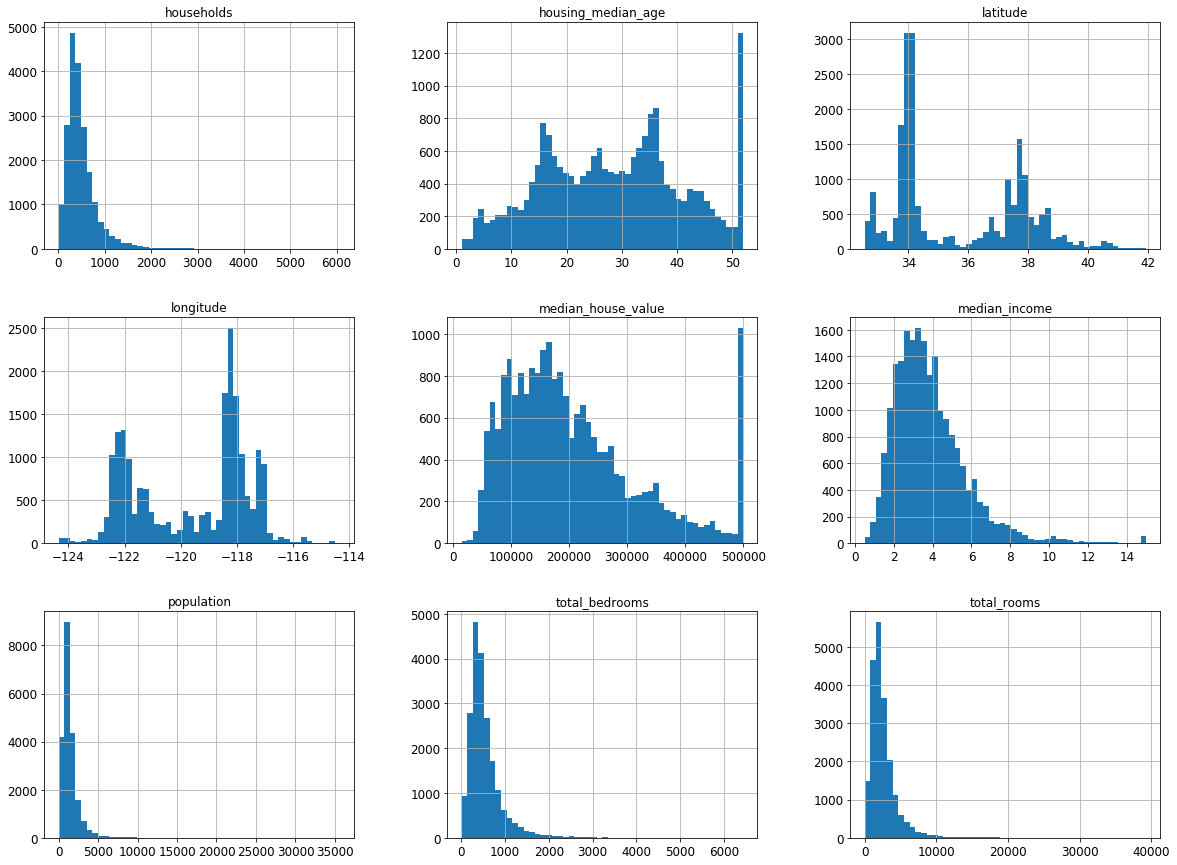

In [5]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Stratify data by median income

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"],
                                 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                 labels=[1, 2, 3, 4, 5])

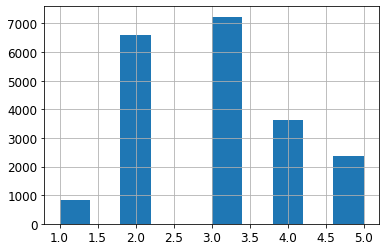

In [7]:
# Display distribution
housing["income_cat"].hist()
plt.show()

In [8]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [9]:
# Confirm statification on test data to the histogram for income_cat
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [10]:
# revert data to original state (remove income_cat)
# use a for loop and set operation to conduct this in a single step
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# Create test set

In [11]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

# Confirm data split

In [13]:
print(f'The number of training data: {len(strat_train_set)} \nThe number of test data: {len(strat_test_set)}')

The number of training data: 16512 
The number of test data: 4128


# Use the training_set for the remaining analysis

In [14]:
housing = strat_train_set.copy()

# Visualize geographical data

 - <code>DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)</code>
 - s : scalar or array_like, optional The size of each point. Possible values are:
 - c : str, int or array_like, optional The color of each point. Possible values are:
 - more information on creating scatter plots with pandas: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.scatter.html

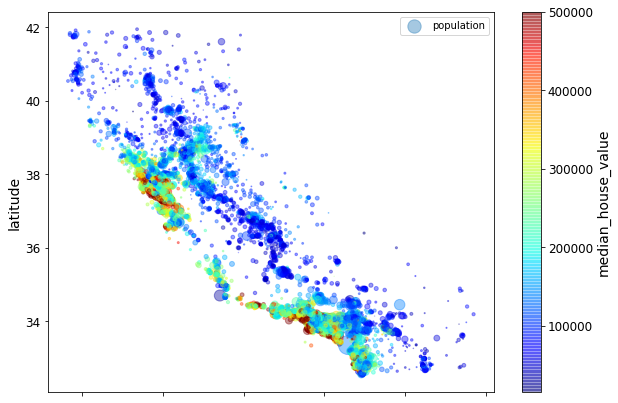

In [15]:
housing.plot(kind='scatter', x="longitude", y='latitude', alpha=0.4,
                      s=housing["population"]/100, label="population", figsize=(10,7),
                      c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.show()

# Evaluate Correlations

 - Pearson's standard correlation coefficient can be computed using:<br>
 - <code>DataFrame.corr(self, method='pearson', min_periods=1)</code>
 - Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [16]:
corr_matrix = housing.corr()

In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

# Plot scatter_matrix

 - Plots every numerical attribute against every other numerical attribute
 - Returns a matrix of scatter plots.<br>
 - <code>pandas.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)</code>
 - Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

In [18]:
# We are limiting the number of scatter plots by focusing on a subset of attributes
attributes = ['housing_median_age', 'total_rooms',
              'median_income','median_house_value']

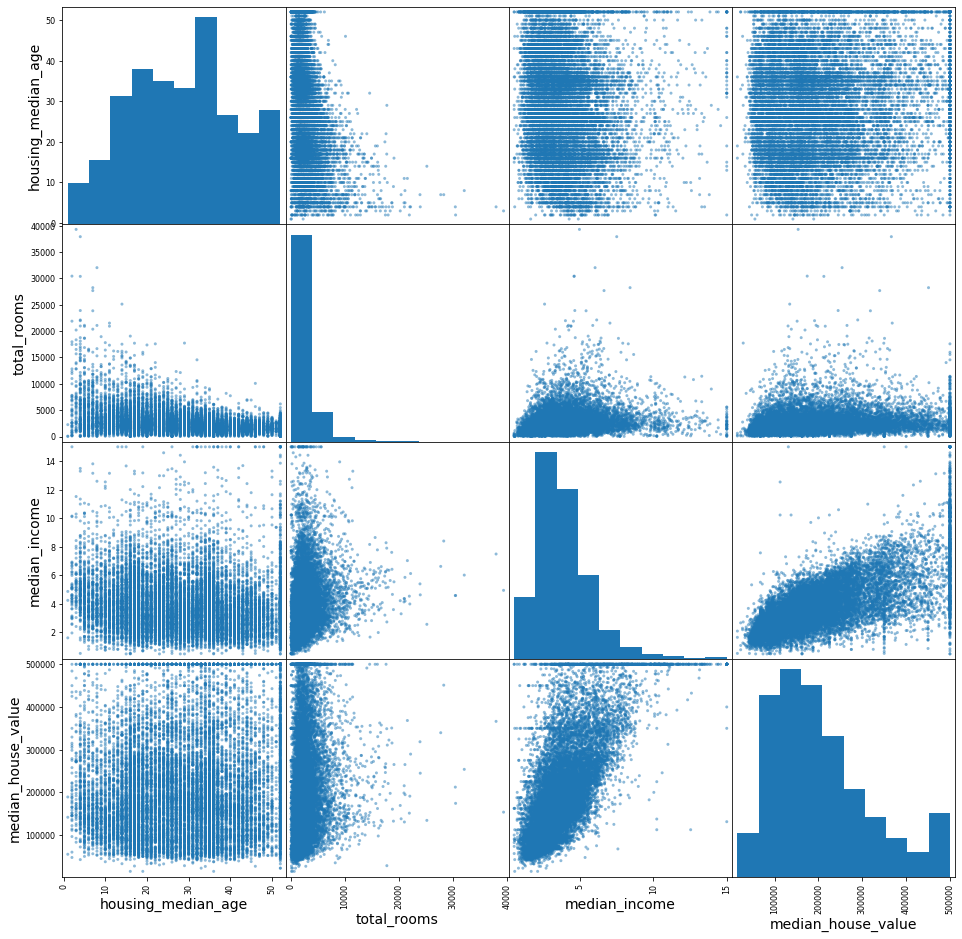

In [19]:
scatter_matrix(housing[attributes], figsize=(16,16))
plt.show()

<font color="blue">Attributes that display correlation: Median Income and Median House Value</font>

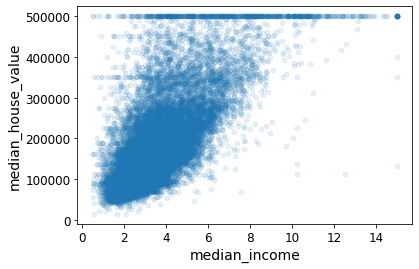

In [20]:
housing.plot(kind='scatter', x="median_income", y='median_house_value', alpha=0.1)
plt.show()

<font color="blue">Characteristics of median income to median house value scatter plot</font>
 - Scatter plot has upward trend
 - points are not too dispersed
 - plot contains some horizontal lines that resemble potential price caps, these features need to be explored and their districts removed to prevent the ML algorithm from reproducing this pattern.

# Feature Engineering

In [21]:
# Create new attributes that might be informative
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

In [22]:
new_corr_matrix = housing.corr()

In [23]:
housing["median_house_value"].sort_values(ascending=False)

15775    500001.0
6374     500001.0
4056     500001.0
15620    500001.0
10574    500001.0
10741    500001.0
15665    500001.0
16118    500001.0
10666    500001.0
4245     500001.0
15697    500001.0
15669    500001.0
511      500001.0
9316     500001.0
20273    500001.0
15701    500001.0
6711     500001.0
14491    500001.0
4071     500001.0
18347    500001.0
17293    500001.0
6390     500001.0
5352     500001.0
15995    500001.0
18075    500001.0
8579     500001.0
5560     500001.0
17141    500001.0
18284    500001.0
15667    500001.0
5312     500001.0
18337    500001.0
8799     500001.0
17213    500001.0
18277    500001.0
16999    500001.0
9016     500001.0
11514    500001.0
20322    500001.0
5257     500001.0
5295     500001.0
16938    500001.0
4224     500001.0
5538     500001.0
5294     500001.0
8305     500001.0
18283    500001.0
17152    500001.0
4034     500001.0
4116     500001.0
5271     500001.0
4715     500001.0
17229    500001.0
18269    500001.0
15707    500001.0
18059    5

<font color="blue">Comment:</font> New attributes provide additional insight into data.

# Prepare data for ML Algorithms

In [24]:
# Features datafame
housing = strat_train_set.drop('median_house_value', axis=1).copy()
# Target dataframe
housing_labels = strat_train_set['median_house_value'].copy()

# Data Cleaning strategy

 - Remove problematic districts <code>dataframe.dropna(subset=[column])</code>
 - Remove attribute <code>dataframe.drop("column", axis=1)</code>
 - Remove or set missing values <code>dataframe["column"].fillna("measure", inplace=boolean)</code>

# Use sklearn SimpleImputer

 - Tool for addressing missing values
 - <code>class sklearn.impute.SimpleImputer(missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
# Instantiate imputer
imputer = SimpleImputer(strategy='median')

In [27]:
# Drop non numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)

In [28]:
# Fit imputer to training data
# This will compute the median on all the columns
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [29]:
# Now use the trained imputer to transform the actual data
X = imputer.transform(housing_num)

In [30]:
# Convert to a dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

In [31]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


# Addressing Text and Categorical Features

 - Most ML algorithms are optimal with numeric values.
 - Categorical features need to be converted to numbers.

# <strong>Option 1: OrdinalEncoder()</strong>

 - <code>sklearn.preprocessing.OrdinalEncoder(categories='auto', dtype=numpy.float64)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
housing_cat = housing[["ocean_proximity"]]

In [34]:
# Instantiate ordinal encoder
ordinal_encoder = OrdinalEncoder()
encoded_housing_category = ordinal_encoder.fit_transform(housing_cat)

In [35]:
# Confirm categories attributes
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
encoded_housing_category[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

# <strong>Option 2: OneHotEncoder()</strong>

 - Encode categorical features as a one-hot numeric array.
 - <code>sklearn.preprocessing.OneHotEncoder(categories='auto', drop=None, sparse=True, dtype=numpy.float64, handle_unknown='error')</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
cat_encoder = OneHotEncoder()
housting_cat_1hot = cat_encoder.fit_transform(housing_cat)
housting_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [39]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Feature Scaling

 - Process by which all attributes are made to exist in the same scale.
 - Two major methods:
1. min-max scaling
2. standardization

# <strong>Option 1: MinMaxScaler()</strong>

 - Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
 - <code>sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

# <strong>Option 2: StandardScaler()</strong>

 - Standardize features by removing the mean and scaling to unit variance.
 - <code>sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# Transformation Pipelines

 - Provides sequence of transformation for data transformation.
 - Pipeline of transforms with a final estimator.
 - <code>sklearn.pipeline.Pipeline(steps, memory=None, verbose=False)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [43]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [44]:
from sklearn.compose import ColumnTransformer

In [45]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [46]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

# <font color="red">Transformed data</font>

In [47]:
housing_prepared = full_pipeline.fit_transform(housing)

# Training and Evaluation on the Training Set

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluate Model

In [56]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [57]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [58]:
print("Labels: ", list(some_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


# Measure Models <font color="red">RMSE</font> Using mean_squared_error()

 - Mean squared error regression loss
 - <code>sklearn.metrics.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

<font color="blue">Comment: </font>This model had a high rmse at $68k. This result is an example of a model underfitting the training data.<br>
Why is this the case?<br>
 - Features do not provide enough information
 - Model not powerful enough
Options to resolve underfitting<br>
 - Select a more complex model (aka powerful)
 - Reduce constraints on the model (when applicable)
 - Add more features (feature engineering)

# Test Using More Complex Model: <font color="red">DecisionTreeRegressor()</font>

 - A decision tree regressor. Model that can find complex nonlinear relationships in the data.
 - <code>sklearn.tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [63]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

<font color="blue">Comment: </font>This model has overfit, which emphasizes the importance of using part of the training set for training the model, and another part for model validation.<br>

# Evaluation using Cross-Validation using <font color="red"> K-fold cross-validation</font>

 - Evaluate a score by cross-validation.
 - Powerful tool used to subset data into distinct 'folds' and then trains and evaluates model several times.
 - Helps identify the best model
 - This model expects a utility function and not a cost function, which computes a negative score before calculating the square root.
 - <code>sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [68]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [69]:
display_scores(tree_rmse_scores)

Scores:  [70361.41245991 66433.50886993 69729.4266377  69203.32150531
 70729.01542806 74553.27427711 71530.04734354 71172.25191263
 75116.15148859 70765.71808788]
Mean:  70959.41280106641
Standard Deviation:  2368.416667063858


<font color="blue">Comment: </font>This seems to perform poorer than the original decision tree model, and even worse than the linear regression. The advantage though is that you get statistics on this model because of the number of times the model is performed.<br>

### Compare performance of cross_val_scores() using linear regression again

In [70]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [71]:
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.674001798344


<font color="blue">Comment: </font>This model performs better than the decision tree cross validation model because decision tree overfits, and then performs poorly than the linear regression.<br>

# Ensemble Learning <font color="red">RandomForestRegression()</font>

 - A random forest regressor..
 - Model trains multiple Decision Trees on a random subset of the features, and then averaging out the predictions.
 - This model builds on top of many other models, and is referred to as <font color="red">Ensemble Learning</font>
 - <code>class sklearn.ensemble.RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

# Evaluate model on the training set:
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_predictions)

forest_rmse = np.sqrt(forest_mse)
forest_rmse

18729.765568294162

In [75]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)

In [76]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [77]:
display_scores(forest_rmse_scores)

Scores:  [49265.24011956 47530.14588142 49838.70687133 52375.72455586
 49357.5655184  53152.88982965 48662.87666784 47687.00825889
 52736.6880017  50199.71647257]
Mean:  50080.656217721444
Standard Deviation:  1930.4324298473077


# Fine-Tune Model using <font color="red">GridSearchCV()</font>

 - Exhaustive search over specified parameter values for an estimator.
 - <code>sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

Specify two dictionaries that have a combination of hyperparameters to test.

In [79]:
param_grid = [
    {"n_estimators":[3,10,30], 'max_features':[2,4,6,7]},
    {"bootstrap":[False], "n_estimators":[3,10], 'max_features':[2,3,4]}
]

In [81]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

In [82]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

### Get the best combination of parameters from these tests

In [84]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 30}

<font color="blue">Comment: </font> Since these are top number of max features and n_estimators, these numbers would need to be increased to determine if there are more optional parameters.<br>

### Get the best estimators directly

In [85]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Display the Evaluation Scores

In [86]:
cvres = grid_search.cv_results_

In [88]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63352.48033232943 {'max_features': 2, 'n_estimators': 3}
55794.18818673954 {'max_features': 2, 'n_estimators': 10}
52768.69033848725 {'max_features': 2, 'n_estimators': 30}
60010.00533172444 {'max_features': 4, 'n_estimators': 3}
52711.76242553314 {'max_features': 4, 'n_estimators': 10}
50479.57063755735 {'max_features': 4, 'n_estimators': 30}
58994.71381542499 {'max_features': 6, 'n_estimators': 3}
51969.562303687395 {'max_features': 6, 'n_estimators': 10}
50173.357854993905 {'max_features': 6, 'n_estimators': 30}
59207.89989942358 {'max_features': 7, 'n_estimators': 3}
52812.256532659274 {'max_features': 7, 'n_estimators': 10}
50110.83890510084 {'max_features': 7, 'n_estimators': 30}
62601.54782319055 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54612.83526219691 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59077.33528578729 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52532.784576404 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

# Analyze the Best Model and Their Errors

In [89]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([6.52653131e-02, 5.83490492e-02, 4.47987057e-02, 1.67536652e-02,
       1.63815151e-02, 1.60972364e-02, 1.60369188e-02, 3.92460012e-01,
       5.33377832e-02, 1.10482426e-01, 4.97928784e-02, 9.59950034e-03,
       1.44698503e-01, 7.33090699e-05, 2.40762100e-03, 3.46556421e-03])

### Display importance score next to their attribute names

In [91]:
# List of extra attributes
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# Encode categories from full_pipeleine
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.39246001151452325, 'median_income'),
 (0.14469850309344642, 'INLAND'),
 (0.11048242577281697, 'pop_per_hhold'),
 (0.06526531308377652, 'longitude'),
 (0.058349049162759056, 'latitude'),
 (0.05333778320604717, 'rooms_per_hhold'),
 (0.049792878394316564, 'bedrooms_per_room'),
 (0.04479870565403472, 'housing_median_age'),
 (0.01675366517547339, 'total_rooms'),
 (0.016381515057461028, 'total_bedrooms'),
 (0.01609723643156278, 'population'),
 (0.016036918829621823, 'households'),
 (0.009599500342297054, '<1H OCEAN'),
 (0.0034655642074183043, 'NEAR OCEAN'),
 (0.0024076210044986206, 'NEAR BAY'),
 (7.330906994638546e-05, 'ISLAND')]

# Evaluate System on Test Set

In [93]:
# Get the best model
final_model = grid_search.best_estimator_

# Get the test dataset ready for modeling
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Transform data
X_test_prepared = full_pipeline.transform(X_test)

final_prediction = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

48147.699718163334

# Compute Confidence Interval using <font color="red">scipy.stats.t.interval()</font>

 - A Student’s t continuous random variable.
 - <code>scipy.stats.t(*args, **kwds)</code>
 - Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [94]:
from scipy import stats

In [97]:
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2

In [99]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([46195.30470163, 50023.95226114])

## <Font color="red">Final Comment</font>

 - This model does not outperform the 20% price estimates by experts
 - The idea to launch depends on whether it will help free up time by experts to work on other projects